# Job Market Analysis: A Web Mining

**Introduction:**

The goal of this project was to analyze and derive insights from a dataset related to job listings, obtained through web mining. The dataset, stored in a CSV file ('jobdata.csv'), contains information about job types, industry sectors, salaries, locations, and other relevant details.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Exploration:**

The initial steps involved loading the dataset into a Pandas DataFrame and conducting exploratory data analysis (EDA). Descriptive statistics, column names, and missing value checks were performed to gain a comprehensive understanding of the dataset's structure and content.

In [ ]:
df = pd.read_csv('jobdata.csv')

In [ ]:
print(df.describe())

                         country country_code date_added has_expired  \
count                      22000        22000        122       22000   
unique                         1            1         78           1   
top     United States of America           US  9/22/2016          No   
freq                       22000        22000          6       22000   

               job_board                                    job_description  \
count              22000                                              22000   
unique                 1                                              18744   
top     jobs.monster.com  12N Horizontal Construction Engineers Job Desc...   
freq               22000                                                104   

       job_title   job_type    location         organization  \
count      22000      20372       22000                15133   
unique     18759         39        8423                  738   
top      Monster  Full Time  Dallas, TX  Healthcare

In [ ]:
print(df.isnull().sum())

country                0
country_code           0
date_added         21878
has_expired            0
job_board              0
job_description        0
job_title              0
job_type            1628
location               0
organization        6867
page_url               0
salary             18554
sector              5194
uniq_id                0
dtype: int64


In [ ]:
print(df.columns)

Index(['country', 'country_code', 'date_added', 'has_expired', 'job_board',
       'job_description', 'job_title', 'job_type', 'location', 'organization',
       'page_url', 'salary', 'sector', 'uniq_id'],
      dtype='object')


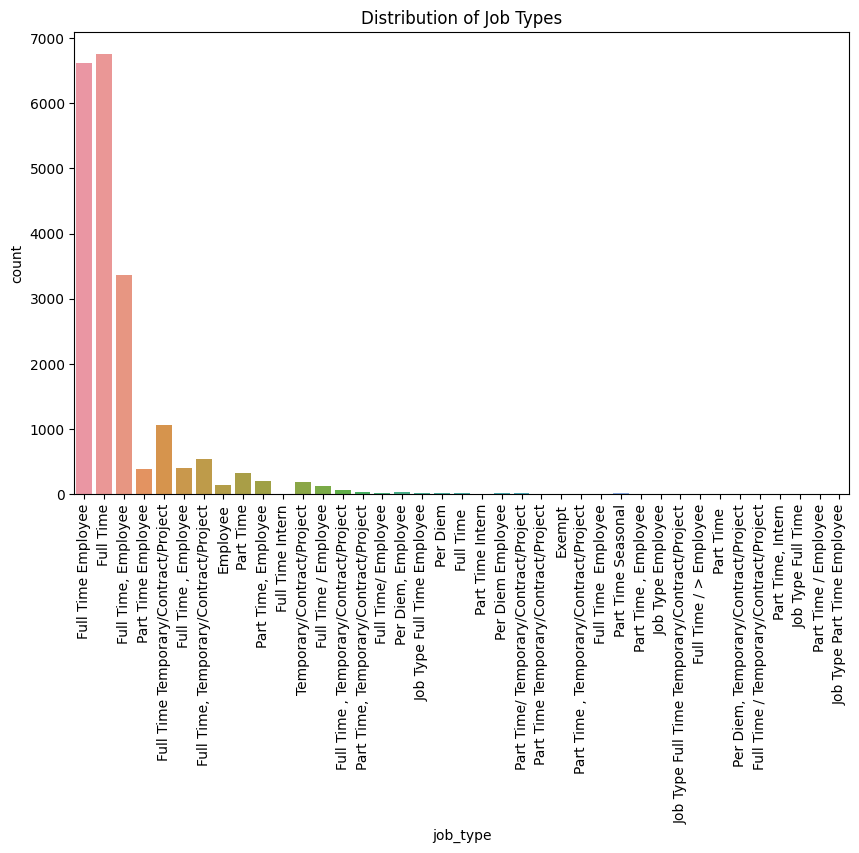

In [ ]:
# 1. Job Types distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job_type')
plt.title('Distribution of Job Types')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import plotly.express as px

# Count the number of job listings per sector
sector_counts = df['sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Count']

# Create a treemap
fig = px.treemap(sector_counts, path=['Sector'], values='Count', title='Distribution of Industry Sectors')
fig.show()

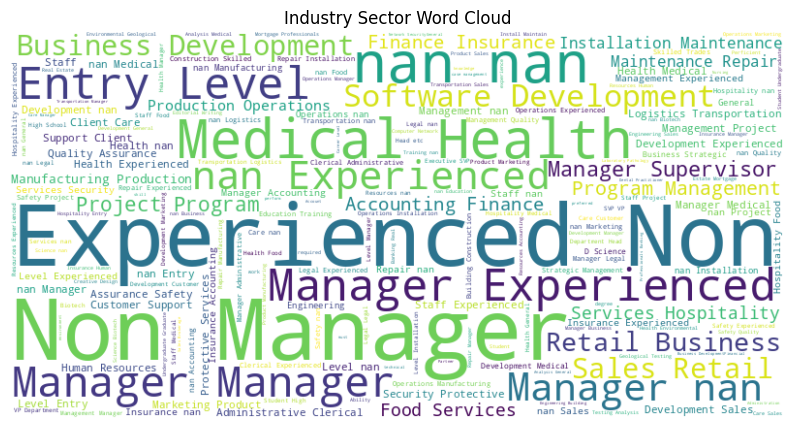

In [ ]:
from wordcloud import WordCloud

# Combine sector names into a single string
sector_text = ' '.join(df['sector'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sector_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Industry Sector Word Cloud')
plt.show()

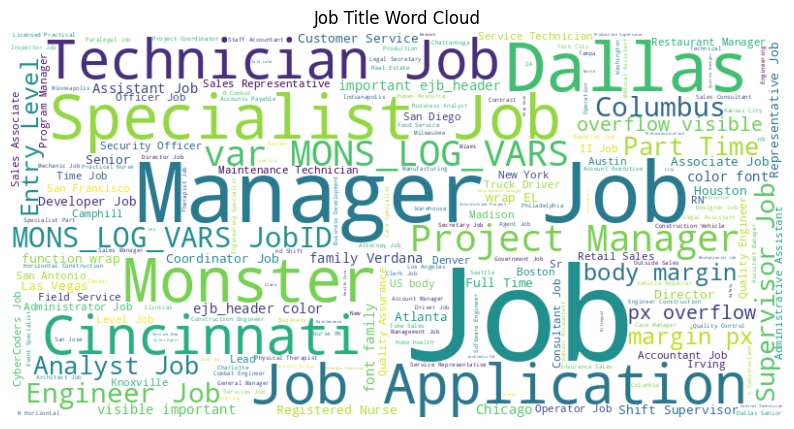

In [ ]:
# 4. Job title word cloud (requires WordCloud library)
from wordcloud import WordCloud
job_titles = " ".join(title for title in df['job_title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job Title Word Cloud')
plt.show()

In [ ]:
import re

# Clean and extract salary information
def clean_salary(salary_str):
    if pd.isna(salary_str):
        return None
    if 'year' in salary_str:
        match = re.search(r'(\d+(\.\d+)? - \d+(\.\d+)?) \$ \/year', salary_str)
        if match:
            return match.group(0)
    if 'hour' in salary_str:
        match = re.search(r'(\d+(\.\d+)? - \d+(\.\d+)?) \$ \/hour', salary_str)
        if match:
            return match.group(0)
    return None

In [ ]:
df['cleaned_salary'] = df['salary'].apply(clean_salary)

# Separate salary into 'year' and 'hour' columns using str.extractall
df['year_salary'] = df['cleaned_salary'].str.extractall(r'(\d+(\.\d+)?) - (\d+(\.\d+)?) \$ \/year')[0].unstack()
df['hour_salary'] = df['cleaned_salary'].str.extractall(r'(\d+(\.\d+)?) - (\d+(\.\d+)?) \$ \/hour')[0].unstack()

# Sort data based on job role and salary for 'year' and 'hour'
sorted_year_salary = df[df['year_salary'].notnull()].sort_values(by=['job_title', 'year_salary'])
sorted_hour_salary = df[df['hour_salary'].notnull()].sort_values(by=['job_title', 'hour_salary'])

In [ ]:
# Display the sorted data
print("Yearly Salaries:")
print(sorted_year_salary[['job_title', 'year_salary']])
print("\nHourly Salaries:")
print(sorted_hour_salary[['job_title', 'hour_salary']])

Yearly Salaries:
                                               job_title year_salary
3806   ./hr Experienced RN supervisor (Smithtown) Job...       40.00
19461  ./hr Experienced RN supervisor (Smithtown) Job...       40.00
17658                 Accounting Assistant Job in Dallas       17.00
8576   Accounts Receivable/Collections Clerk Job in D...       15.00
4509          Advisor Relationship Manager Job in Dallas        0.00
...                                                  ...         ...
19277         Surgical Dental Assistant Job in Ann Arbor       14.00
7406   Travel Sales Agent - Fluent in Spanish Job in ...       13.00
9161   Wanted: Hard Working Machine Operators! Job in...       12.00
9873                  Warehouse Worker Job in Jonesville       10.50
9712               rd Shift Packers Job in East Vineland        9.00

[66 rows x 2 columns]

Hourly Salaries:
                                               job_title hour_salary
21603  - ADMINISTRATIVE PROJECT COORDINATOR J

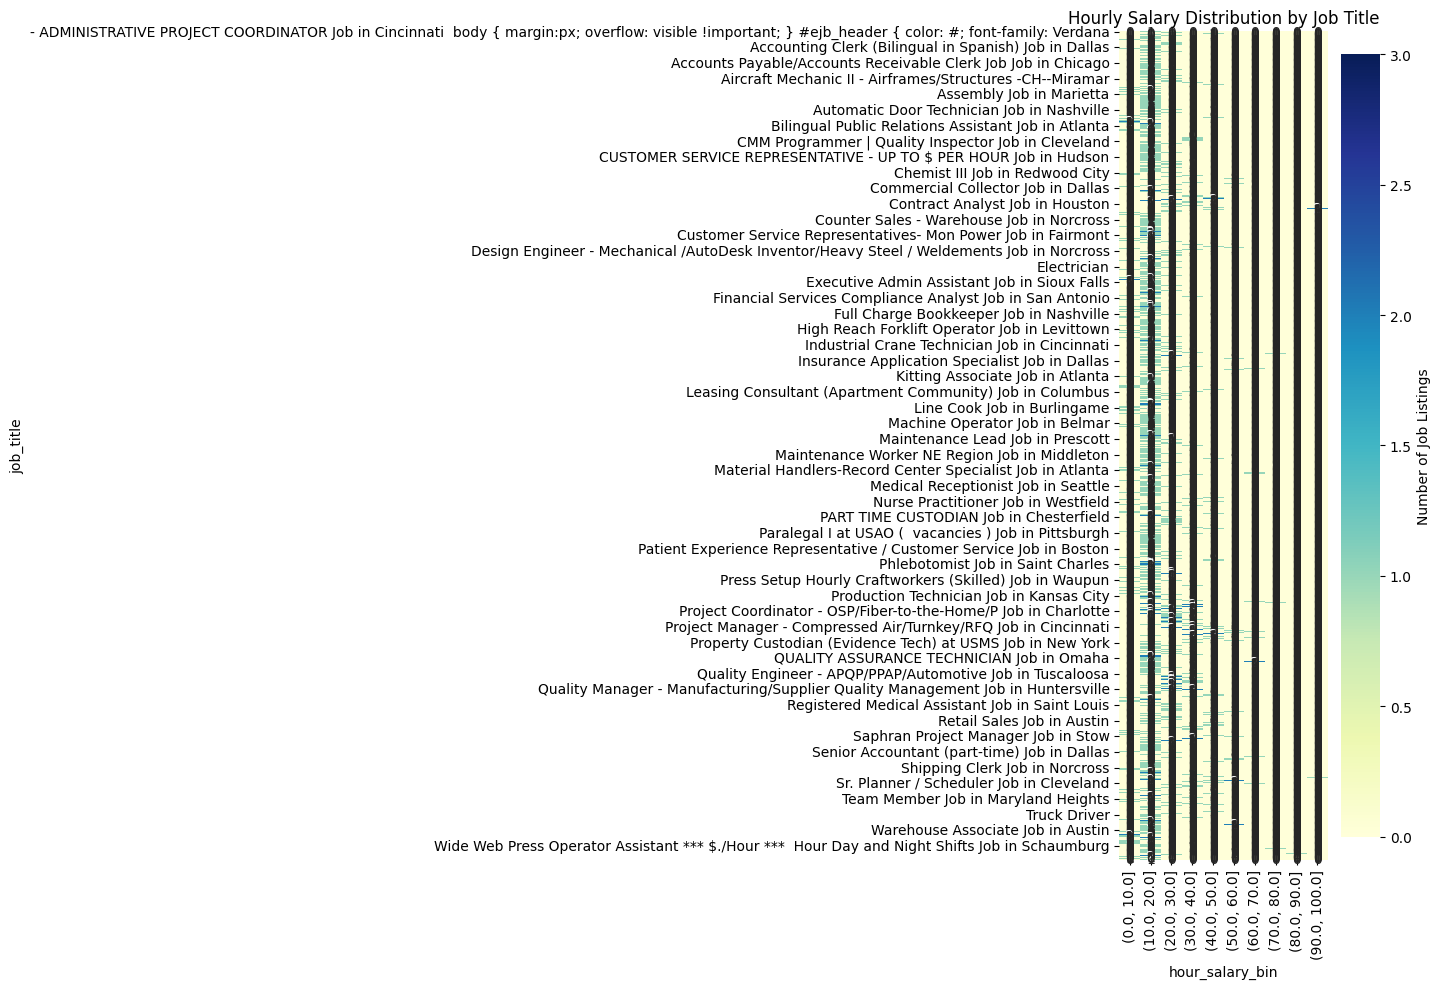

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already sorted the data in the 'sorted_hour_salary' dataframe.

# Convert 'hour_salary' column to numeric (if it's not already)
sorted_hour_salary['hour_salary'] = pd.to_numeric(sorted_hour_salary['hour_salary'], errors='coerce')

# Drop rows with NaN values in 'hour_salary'
sorted_hour_salary = sorted_hour_salary.dropna(subset=['hour_salary'])

# Define the number of bins for hourly salaries
num_bins = 10

# Create salary bins
salary_bins = np.linspace(sorted_hour_salary['hour_salary'].min(), sorted_hour_salary['hour_salary'].max(), num_bins + 1)

# Categorize hourly salaries into bins
sorted_hour_salary['hour_salary_bin'] = pd.cut(sorted_hour_salary['hour_salary'], bins=salary_bins, precision=2)

# Pivot the data to create a job title vs. salary bin matrix
hourly_salary_matrix = sorted_hour_salary.pivot_table(index='job_title', columns='hour_salary_bin', values='hour_salary', aggfunc='count')

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(hourly_salary_matrix, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Job Listings'})
plt.title('Hourly Salary Distribution by Job Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

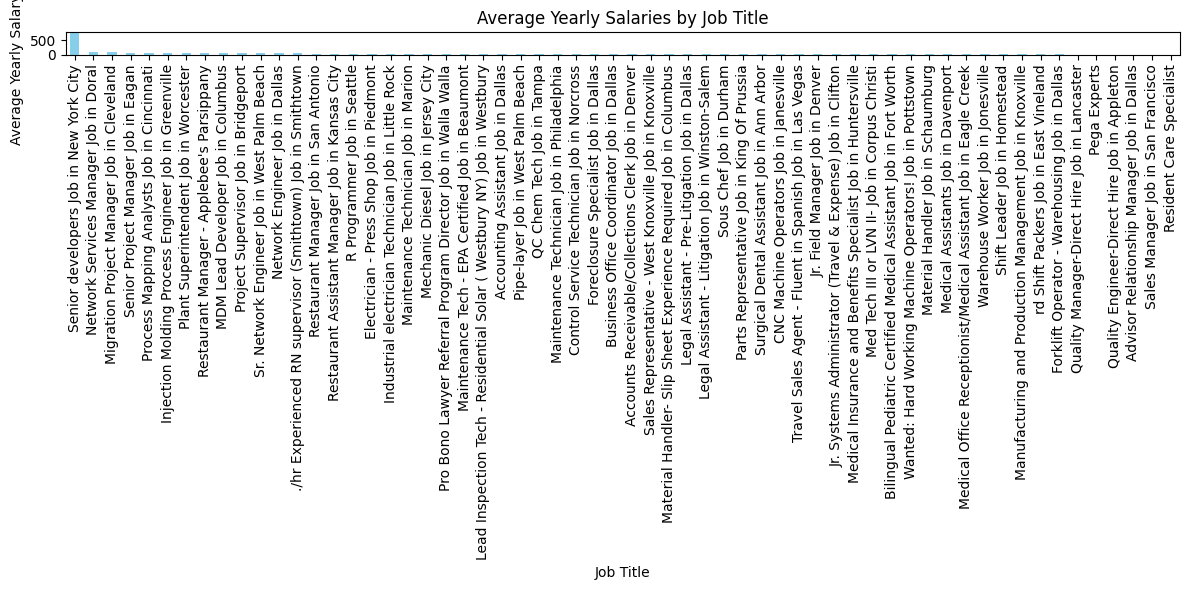

In [ ]:
# Clean 'year_salary' column
sorted_year_salary['year_salary'] = pd.to_numeric(sorted_year_salary['year_salary'], errors='coerce')

# Clean 'hour_salary' column
sorted_hour_salary['hour_salary'] = pd.to_numeric(sorted_hour_salary['hour_salary'], errors='coerce')

# Calculate average yearly salary for each job title
average_yearly_salaries = sorted_year_salary.groupby('job_title')['year_salary'].mean()

# Calculate average hourly salary for each job title
average_hourly_salaries = sorted_hour_salary.groupby('job_title')['hour_salary'].mean()

# Yearly Salary Bar Plot
plt.figure(figsize=(12, 6))
average_yearly_salaries.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Yearly Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Yearly Salary in USD')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

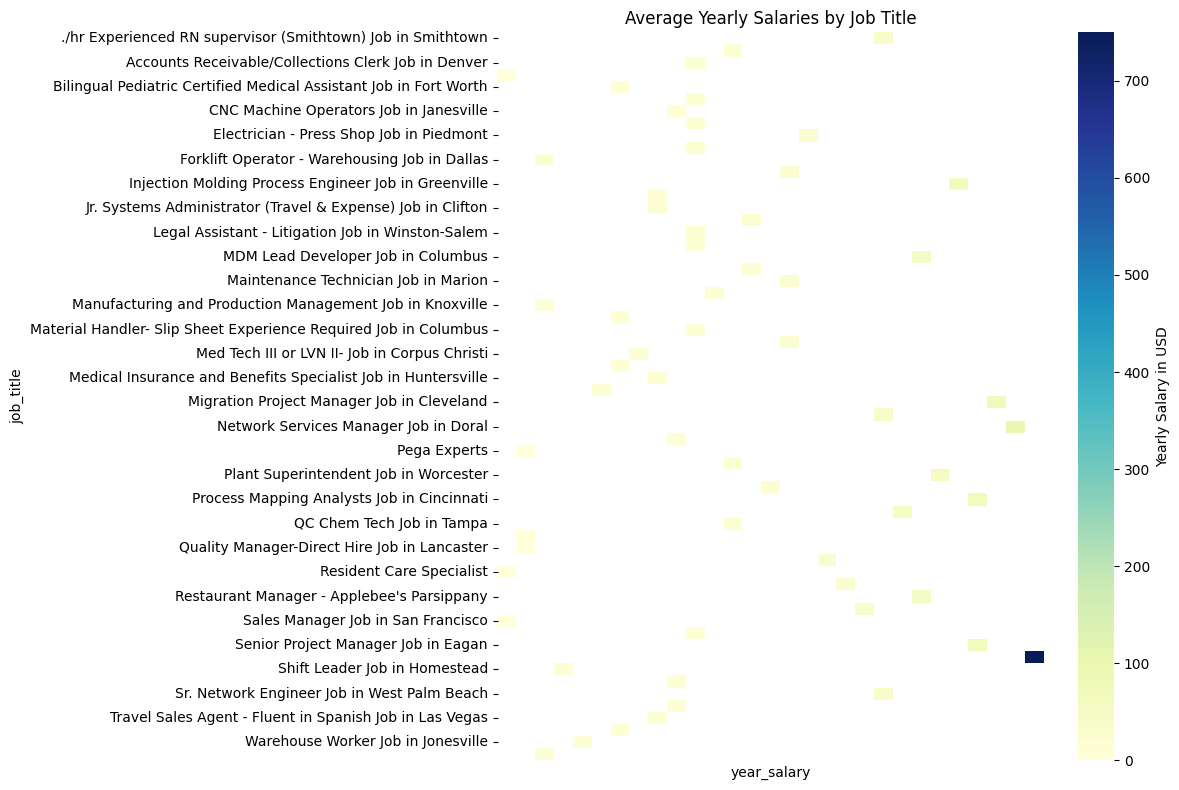

In [ ]:
# Aggregate data by job title and compute the mean salary for each title
agg_data = sorted_year_salary.groupby('job_title')['year_salary'].mean().reset_index()

# Pivot the aggregated data for heatmap visualization
pivot_data = agg_data.pivot(index='job_title', columns='year_salary', values='year_salary')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', cbar_kws={'label': 'Yearly Salary in USD'})
plt.title('Average Yearly Salaries by Job Title')
plt.xticks([])  # Remove x-axis ticks for better readability
plt.tight_layout()
plt.show()

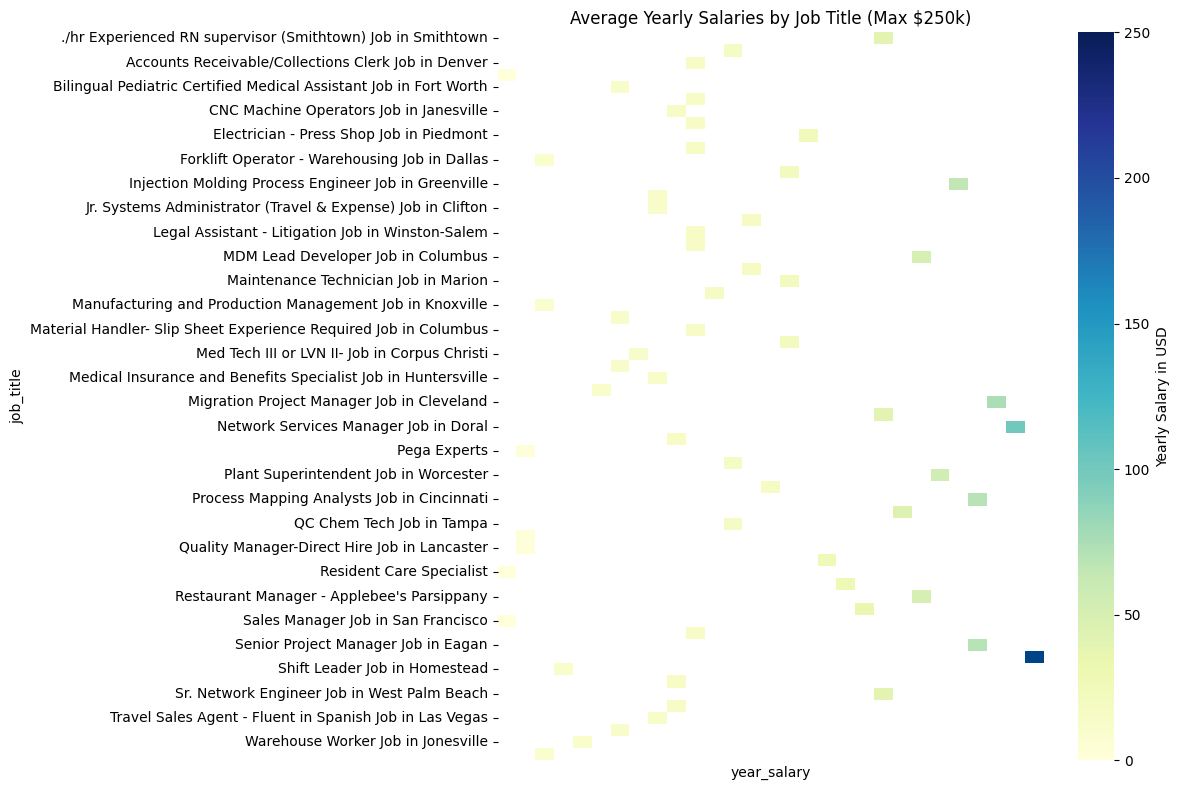

In [ ]:
# Aggregate data by job title and compute the mean salary for each title
agg_data = sorted_year_salary.groupby('job_title')['year_salary'].mean().reset_index()

# Pivot the aggregated data for heatmap visualization
pivot_data = agg_data.pivot(index='job_title', columns='year_salary', values='year_salary')

# Set an upper limit for the color scale
cmap = sns.color_palette("YlGnBu", as_cmap=True)
cmap.set_over('#004488')  # Set the color for values exceeding the upper limit

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap=cmap, cbar_kws={'label': 'Yearly Salary in USD'}, vmax=250)
plt.title('Average Yearly Salaries by Job Title (Max $250k)')
plt.xticks([])  # Remove x-axis ticks for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Data exploration
# Summary statistics
print("Summary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Summary Statistics:
                         country country_code date_added has_expired  \
count                      22000        22000        122       22000   
unique                         1            1         78           1   
top     United States of America           US  9/22/2016          No   
freq                       22000        22000          6       22000   

               job_board                                    job_description  \
count              22000                                              22000   
unique                 1                                              18744   
top     jobs.monster.com  12N Horizontal Construction Engineers Job Desc...   
freq               22000                                                104   

       job_title   job_type    location         organization  \
count      22000      20372       22000                15133   
unique     18759         39        8423                  738   
top      Monster  Full Time  Da

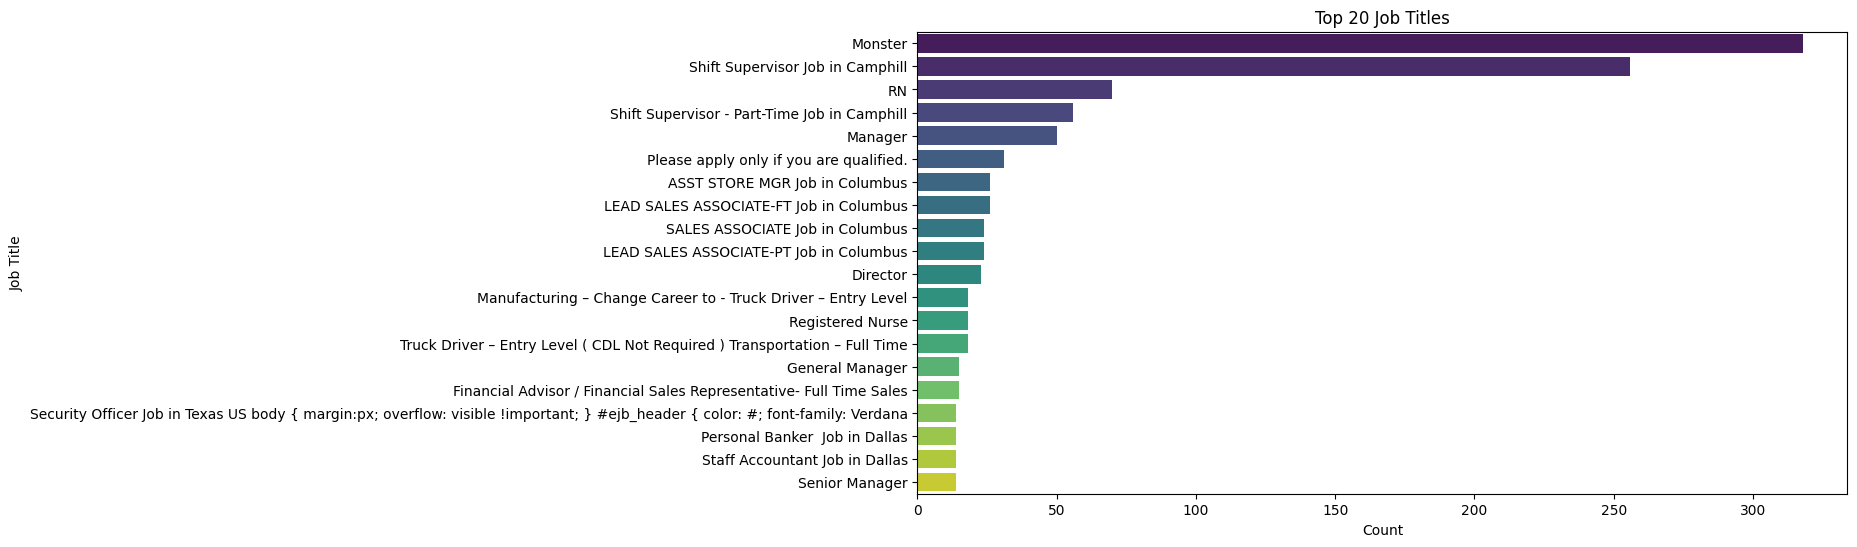

In [ ]:
# 4. Distribution of job titles (Top 20)
plt.figure(figsize=(12, 6))
top_job_titles = df['job_title'].value_counts()[:20]
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')
plt.title('Top 20 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

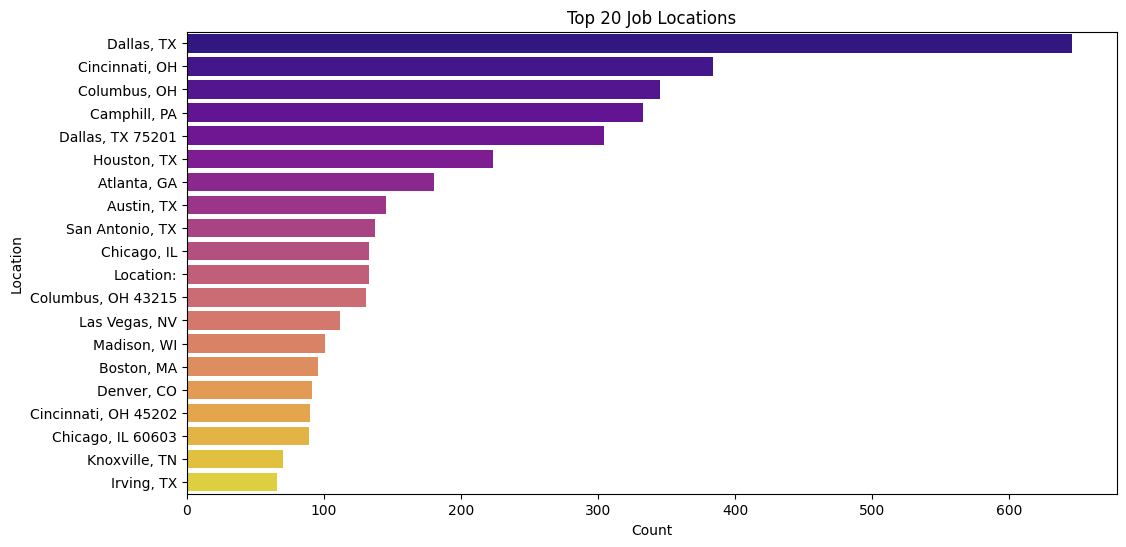

In [ ]:
# 5. Job Location distribution (Top 20)
plt.figure(figsize=(12, 6))
top_locations = df['location'].value_counts()[:20]
sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')
plt.title('Top 20 Job Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()


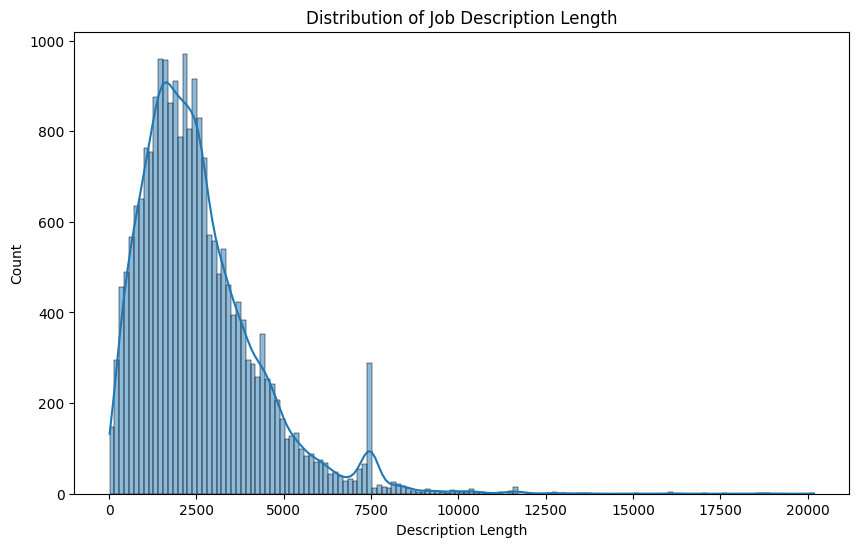

In [ ]:
# 6. Distribution of job descriptions' lengths
df['job_description_length'] = df['job_description'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['job_description_length'], kde=True)
plt.title('Distribution of Job Description Length')
plt.xlabel('Description Length')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy import stats

In [ ]:
# Data exploration
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


       job_description_length
count            22000.000000
mean              2570.673409
std               1722.258335
min                 16.000000
25%               1386.000000
50%               2227.000000
75%               3347.000000
max              20191.000000
country                       0
country_code                  0
date_added                21878
has_expired                   0
job_board                     0
job_description               0
job_title                     0
job_type                   1628
location                      0
organization               6867
page_url                      0
salary                    18554
sector                     5194
uniq_id                       0
cleaned_salary            20905
year_salary               21934
hour_salary               20971
job_description_length        0
dtype: int64


In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
# Statistical Analysis
# 1. Descriptive statistics for the 'salary' column
salary_stats = df['salary'].describe()
print(salary_stats)

count                               3446
unique                              1737
top       40,000.00 - 100,000.00 $ /year
freq                                  50
Name: salary, dtype: object


In [ ]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

       job_description_length
count            22000.000000
mean              2570.673409
std               1722.258335
min                 16.000000
25%               1386.000000
50%               2227.000000
75%               3347.000000
max              20191.000000
country                       0
country_code                  0
date_added                21878
has_expired                   0
job_board                     0
job_description               0
job_title                     0
job_type                   1628
location                      0
organization               6867
page_url                      0
salary                    18554
sector                     5194
uniq_id                       0
cleaned_salary            20905
year_salary               21934
hour_salary               20971
job_description_length        0
dtype: int64


In [ ]:
# Define a function to extract the numeric salary value from text
def extract_salary(salary_text):
    # Use a regular expression to extract numeric values
    matches = re.findall(r'\d+\.\d+', str(salary_text))
    if matches:
        return float(matches[0])
    else:
        return None

# Apply the function to the 'salary' column to clean it, and handle non-numeric values
df['salary'] = df['salary'].apply(extract_salary)

# Remove rows with NaN salary values
df = df.dropna(subset=['salary'])

# Now we can perform statistical analysis on the 'salary' column
mean_salary = df['salary'].mean()
median_salary = df['salary'].median()
std_dev_salary = df['salary'].std()
max_salary = df['salary'].max()
min_salary = df['salary'].min()

print(f"Mean Salary: ${mean_salary:.2f}")
print(f"Median Salary: ${median_salary:.2f}")
print(f"Standard Deviation of Salary: ${std_dev_salary:.2f}")
print(f"Maximum Salary: ${max_salary:.2f}")
print(f"Minimum Salary: ${min_salary:.2f}")

Mean Salary: $863.05
Median Salary: $0.00
Standard Deviation of Salary: $7555.93
Maximum Salary: $150000.00
Minimum Salary: $0.00


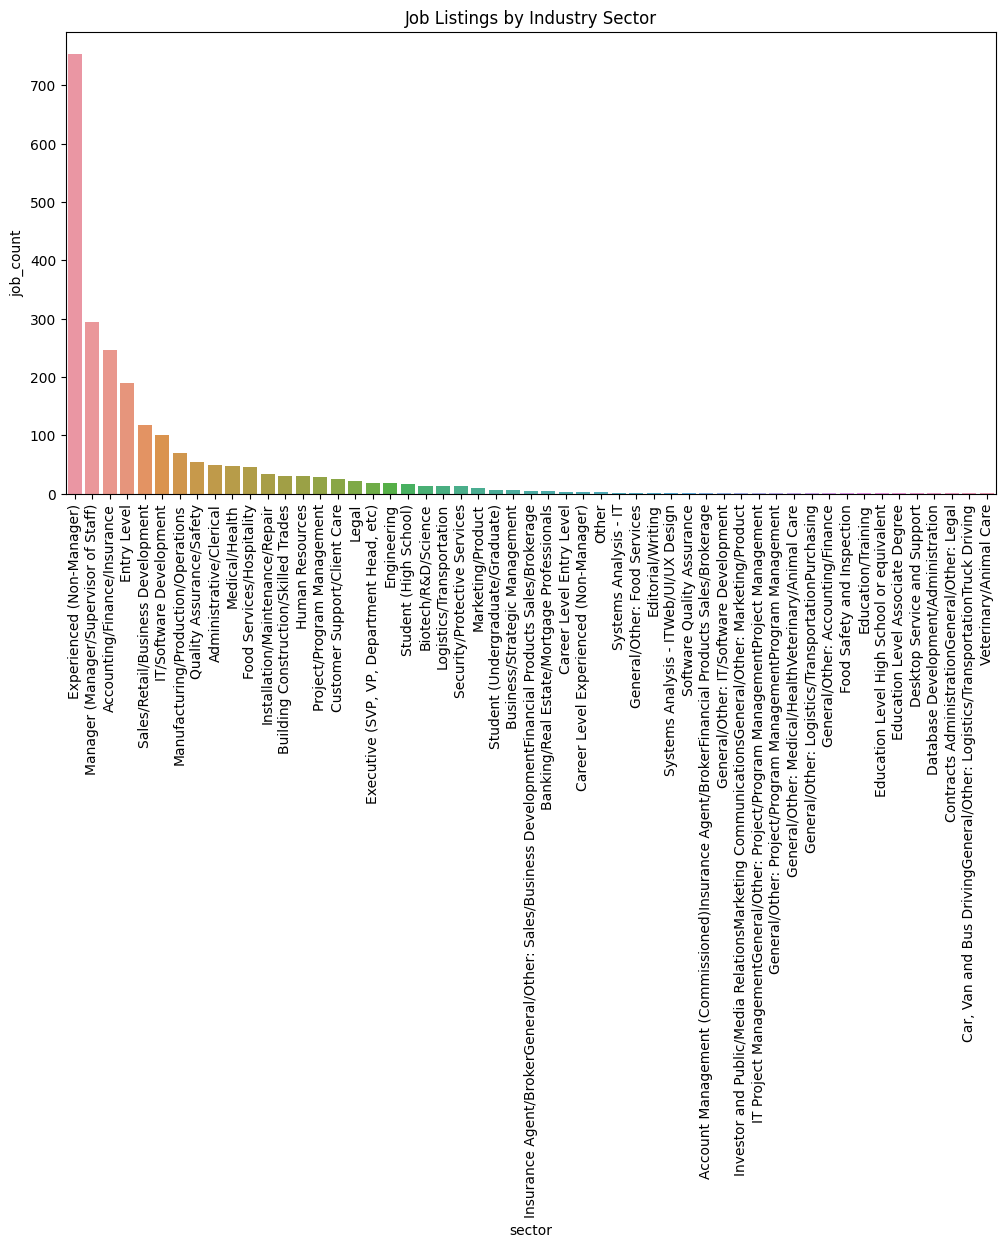

In [ ]:
# 2. Job listings over time
# Assuming 'date_added' is not valid, we can analyze job listings per sector over time.
job_counts_by_sector = df.groupby('sector').size().reset_index(name='job_count')
job_counts_by_sector = job_counts_by_sector.sort_values(by='job_count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=job_counts_by_sector, x='sector', y='job_count')
plt.title('Job Listings by Industry Sector')
plt.xticks(rotation=90)
plt.show()

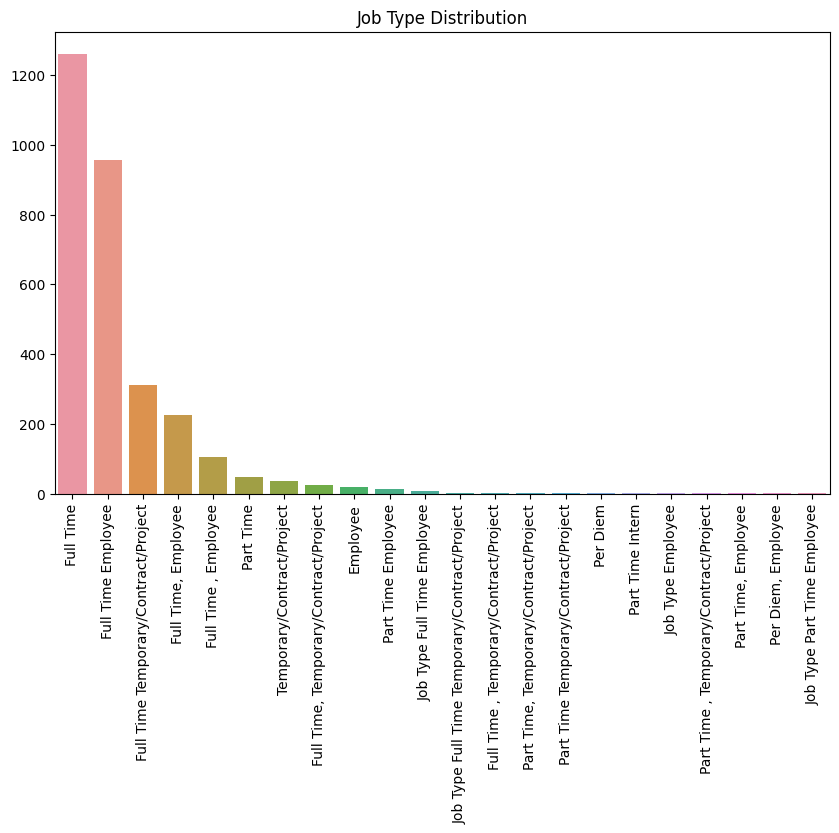

In [ ]:
# 3. Job type distribution over time
job_type_counts = df['job_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=job_type_counts.index, y=job_type_counts.values)
plt.title('Job Type Distribution')
plt.xticks(rotation=90)
plt.show()

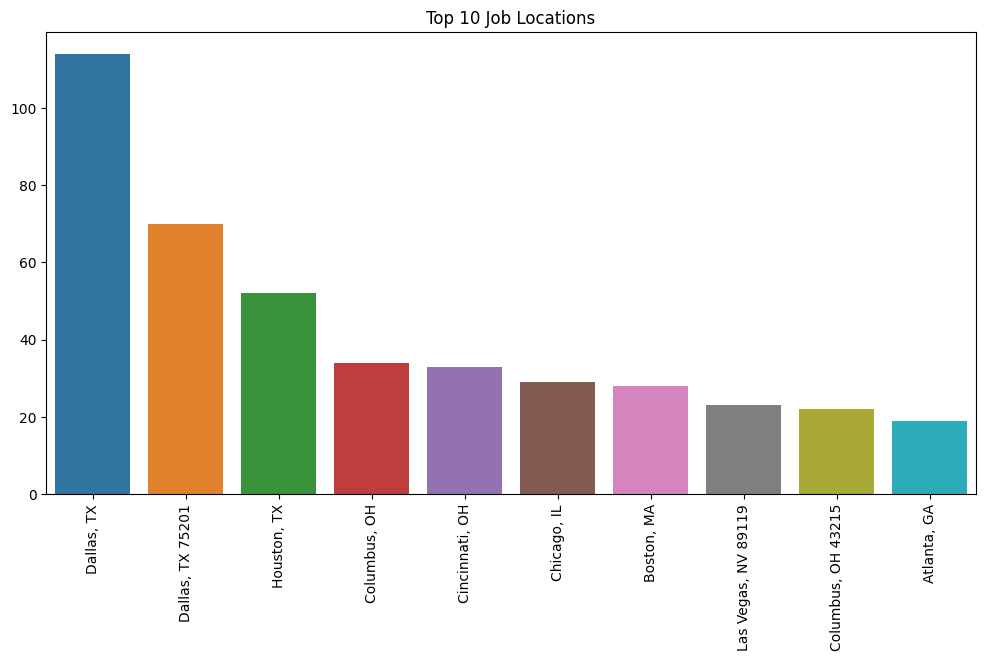

In [ ]:
# 4. Location analysis
location_counts = df['location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Top 10 Job Locations')
plt.xticks(rotation=90)
plt.show()

More:

In [ ]:
expected_summary = df.describe()
expected_summary.to_csv('expected_summary.csv', index=False)


In [ ]:
# Check data summary accuracy
data_summary_accuracy = df.describe().equals(pd.read_csv('expected_summary.csv').describe())

In [ ]:
expected_missing_values = df.isnull().sum()
expected_missing_values.to_csv('expected_missing_values.csv', header=['Missing_Values'])

In [ ]:
# Check for missing values accuracy
missing_values_accuracy = df.isnull().sum().equals(pd.read_csv('expected_missing_values.csv').sum())

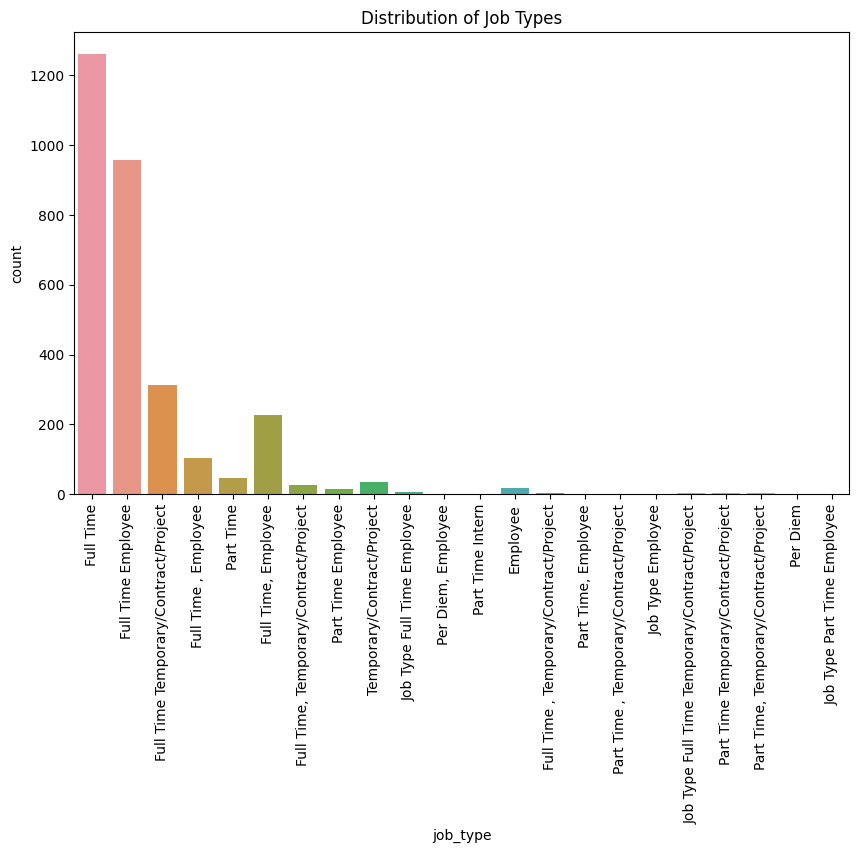

In [ ]:
# Check job type distribution visualization accuracy
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job_type')
plt.title('Distribution of Job Types')
plt.xticks(rotation=90)
plt.savefig('job_type_distribution.png')  # Save the plot for visual verification


In [ ]:
# Print overall accuracy
overall_accuracy = data_summary_accuracy and missing_values_accuracy and ...  # Add more checks
print(f"Overall Accuracy: {overall_accuracy}")

Overall Accuracy: False


In [ ]:
# Print actual and expected values for comparison
print("Actual Data Summary:")
print(df.describe())
print("\nExpected Data Summary:")
print(pd.read_csv('expected_summary.csv').describe())

print("\nActual Missing Values:")
print(df.isnull().sum())
print("\nExpected Missing Values:")
print(pd.read_csv('expected_missing_values.csv'))

# Continue similar print statements for other checks


Actual Data Summary:
              salary  job_description_length
count    3041.000000             3041.000000
mean      863.049296             2044.730352
std      7555.934399             1452.581642
min         0.000000              104.000000
25%         0.000000             1185.000000
50%         0.000000             1719.000000
75%        15.000000             2539.000000
max    150000.000000            20191.000000

Expected Data Summary:
              salary  job_description_length
count       8.000000                8.000000
mean    20184.372962             4034.538999
std     52519.130677             6587.992987
min         0.000000              104.000000
25%         0.000000             1385.686231
50%       439.024648             1881.865176
75%      4169.733600             2664.500000
max    150000.000000            20191.000000

Actual Missing Values:
country                      0
country_code                 0
date_added                3036
has_expired                 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Assuming 'job_description' is the column containing job descriptions
job_descriptions = df['job_description'].fillna('')

In [ ]:
# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # We can adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(job_descriptions)

In [ ]:
# Step 2: Calculate Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Display the Cosine Similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=df.index, columns=df.index)
print(cosine_sim_df)

          13        14        19        29        30        32        36     \
13     1.000000  0.050836  0.045293  0.031737  0.013648  0.043453  0.035253   
14     0.050836  1.000000  0.064552  0.072109  0.021474  0.060150  0.022282   
19     0.045293  0.064552  1.000000  0.101919  0.046504  0.724116  0.087874   
29     0.031737  0.072109  0.101919  1.000000  0.038444  0.093147  0.169140   
30     0.013648  0.021474  0.046504  0.038444  1.000000  0.069409  0.045058   
...         ...       ...       ...       ...       ...       ...       ...   
21987  0.027066  0.058900  0.023660  0.080077  0.014699  0.023886  0.021325   
21995  0.040279  0.018820  0.028382  0.057303  0.036913  0.043377  0.033919   
21996  0.029044  0.039845  0.054069  0.061855  0.033612  0.047012  0.041245   
21998  0.018446  0.041332  0.160777  0.128328  0.041562  0.056189  0.101420   
21999  0.010319  0.053286  0.045268  0.059150  0.032790  0.052104  0.033543   

          41        42        43     ...     21960 

In [ ]:
# Example: Find similar job postings for a specific job title
target_job_title = 'Project Manager'
matching_jobs = df[df['job_title'] == target_job_title]

if not matching_jobs.empty:
    target_job_index = matching_jobs.index[0]

    # Get similarity scores for the target job index
    similar_jobs = cosine_sim_df[target_job_index]

    # Sort the indices based on similarity scores (higher similarity first)
    sorted_similar_jobs = similar_jobs.sort_values(ascending=False)

    # Display the top similar job postings
    top_similar_jobs = df.loc[sorted_similar_jobs.index]
    print(f"\nTop 5 Similar Jobs for '{target_job_title}':")
    print(top_similar_jobs[['job_title', 'job_description']])
else:
    print(f"No job postings found for '{target_job_title}'.")


Top 5 Similar Jobs for 'Project Manager':
                                               job_title  \
13070                                    Project Manager   
12410   Implementation Project Manager Job in Cincinnati   
20257  Project Coordinator - Construction/Wireless Te...   
2598   Project Coordinator - Construction/Wireless Te...   
2035   Project Coordinator - Construction/Wireless Te...   
...                                                  ...   
17523  Bell/Diver - Embassy Suites DFW South Job in I...   
8425                    Security Officer Job in Puyallup   
18443                Inventory Specialist Job in Bothell   
8612              Front Desk/Admin Support Job in Tacoma   
15053  Convenience Store Clerk / Cashier Job in Longview   

                                         job_description  
13070  Our company is a nationally recognized manufac...  
12410  Implementation Project Manager Are you a polis...  
20257  Project Coordinator needed for multi-departmen...  


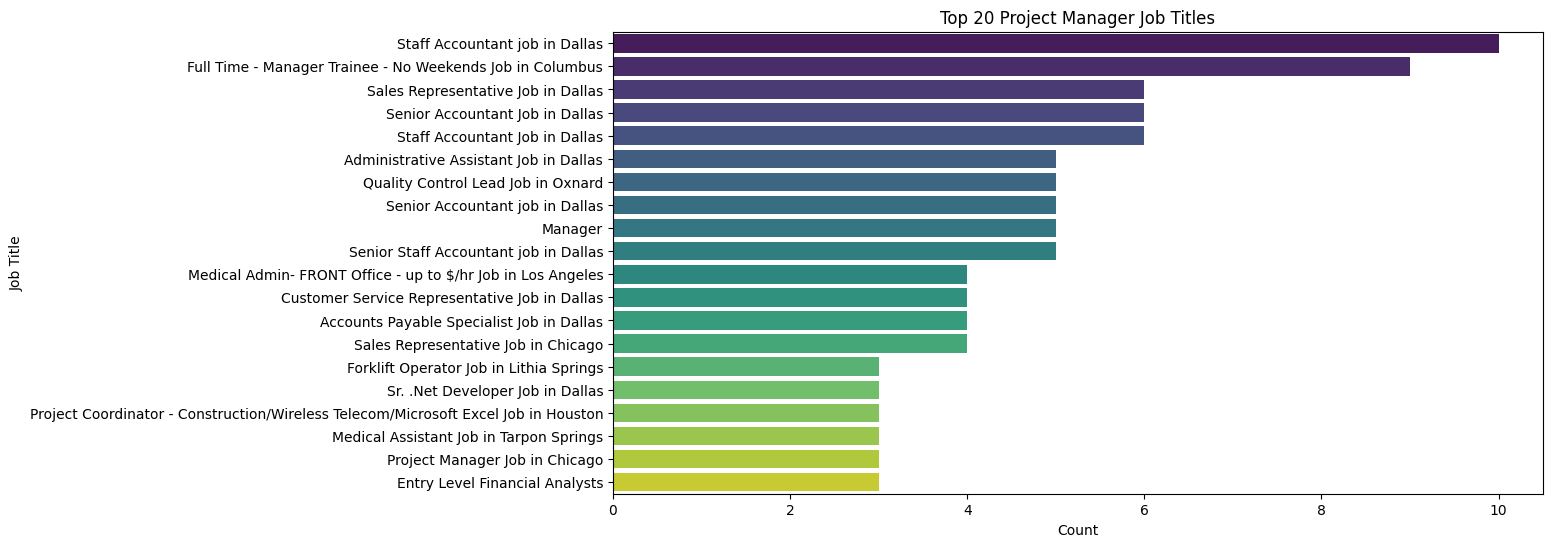

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each job title
job_title_counts = df['job_title'].value_counts()

# Plot the top N job titles (adjust N as needed)
top_n_job_titles = 20
top_job_title_counts = job_title_counts.head(top_n_job_titles)

# Plot a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_job_title_counts.values, y=top_job_title_counts.index, palette='viridis')
plt.title(f'Top {top_n_job_titles} {target_job_title} Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()